In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

8


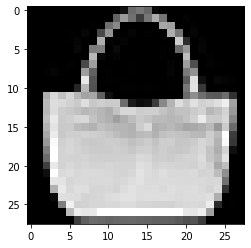

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_images[100],cmap='gray')
print(train_labels[100])

In [4]:
# Normalisation
train_images = train_images/255.
test_images = test_images/255.

In [5]:
# Designing the model
model = keras.Sequential([
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128,activation=tf.nn.relu),
                          keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.87): # Experiment with changing this value
      print("\nReached 87% accuracy so cancelling training!")
      self.model.stop_training = True

In [7]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images,train_labels,epochs=5,callbacks=[myCallback()])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5003 - accuracy: 0.8221
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8633
Epoch 3/5
1863/1875 [============================>.] - ETA: 0s - loss: 0.3353 - accuracy: 0.8775
Reached 87% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8774


In [8]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3687 - accuracy: 0.8680


[0.36871081590652466, 0.8679999709129333]

6


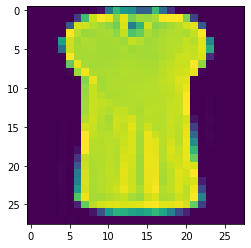

In [10]:
plt.imshow(test_images[765])
z = np.reshape(test_images[765],(1,784))
print(np.argmax(model.predict(z)))

The label 6 stands for tshirt. You can check out what the labels mean [here](https://github.com/zalandoresearch/fashion-mnist#labels)